# Import necesarry libraries

In [220]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from scipy.stats import randint
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
import seaborn as sns

# Import data

In [221]:
df = pd.read_csv("data.csv")

# Exploratory data analysis

In [222]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Handling inbalance

In [224]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [225]:
df[df['Churn'] == 'No'] = df[df['Churn'] == 'No'][:1869]
df.dropna(inplace=True)

## Changing column types

In [226]:
df.drop('MultipleLines', axis=1, inplace=True)

In [227]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [228]:
df_categorical = df[['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'OnlineSecurity', 
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                     'PaperlessBilling', 'PaymentMethod', 'Churn']]
df_numerical = df[['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]

In [229]:
df_categorical_encoded = pd.get_dummies(df_categorical)

In [230]:
df_categorical_encoded

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,0,0,1,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,1,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,1,1,0,1,0,0,1,1,0,...,1,0,0,1,0,0,1,0,0,1
7026,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
7032,0,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
7034,1,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1


In [231]:
df_categorical_encoded.columns

Index(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
      

In [232]:
df_categorical_encoded.drop('gender_Female', axis=1, inplace=True)
df_categorical_encoded.drop('Partner_No', axis=1, inplace=True)
df_categorical_encoded.drop('Dependents_No', axis=1, inplace=True)
df_categorical_encoded.drop('PhoneService_No', axis=1, inplace=True)
df_categorical_encoded.drop('InternetService_No', axis=1, inplace=True)
df_categorical_encoded.drop('OnlineSecurity_No', axis=1, inplace=True)
df_categorical_encoded.drop('OnlineSecurity_No internet service', axis=1, inplace=True)
df_categorical_encoded.drop('OnlineBackup_No', axis=1, inplace=True)
df_categorical_encoded.drop('OnlineBackup_No internet service', axis=1, inplace=True)
df_categorical_encoded.drop('DeviceProtection_No', axis=1, inplace=True)
df_categorical_encoded.drop('DeviceProtection_No internet service', axis=1, inplace=True)
df_categorical_encoded.drop('TechSupport_No', axis=1, inplace=True)
df_categorical_encoded.drop('TechSupport_No internet service', axis=1, inplace=True)
df_categorical_encoded.drop('StreamingTV_No', axis=1, inplace=True)
df_categorical_encoded.drop('StreamingTV_No internet service', axis=1, inplace=True)
df_categorical_encoded.drop('StreamingMovies_No', axis=1, inplace=True)
df_categorical_encoded.drop('StreamingMovies_No internet service', axis=1, inplace=True)
df_categorical_encoded.drop('PaperlessBilling_No', axis=1, inplace=True)
df_categorical_encoded.drop('Churn_No', axis=1, inplace=True)






In [233]:
df_categorical_encoded

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,1,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,1
3,1,0,0,0,1,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,1,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
7026,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
7032,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
7034,0,0,0,1,0,1,1,1,1,0,...,0,1,0,0,1,0,1,0,0,1


In [234]:
df_categorical_encoded.columns

Index(['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [235]:
df_new = pd.concat([df_numerical, df_categorical_encoded], axis=1)

In [236]:
df_new

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0.0,1.0,29.85,29.85,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0.0,34.0,56.95,1889.50,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
2,3668-QPYBK,0.0,2.0,53.85,108.15,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,1
3,7795-CFOCW,0.0,45.0,42.30,1840.75,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,9237-HQITU,0.0,2.0,70.70,151.65,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,0.0,12.0,59.80,727.80,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,1
7026,8775-CEBBJ,0.0,9.0,44.20,403.35,0,0,0,1,1,...,0,1,0,0,1,1,0,0,0,1
7032,6894-LFHLY,1.0,1.0,75.75,75.75,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
7034,0639-TSIQW,0.0,67.0,102.95,6886.25,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1


In [237]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 0 to 7041
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               3738 non-null   object 
 1   SeniorCitizen                            3738 non-null   float64
 2   tenure                                   3738 non-null   float64
 3   MonthlyCharges                           3738 non-null   float64
 4   TotalCharges                             3733 non-null   float64
 5   gender_Male                              3738 non-null   uint8  
 6   Partner_Yes                              3738 non-null   uint8  
 7   Dependents_Yes                           3738 non-null   uint8  
 8   PhoneService_Yes                         3738 non-null   uint8  
 9   InternetService_DSL                      3738 non-null   uint8  
 10  InternetService_Fiber optic              3738 no

In [238]:
df_new.dropna(inplace=True)

In [239]:
df_new

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0.0,1.0,29.85,29.85,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0.0,34.0,56.95,1889.50,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
2,3668-QPYBK,0.0,2.0,53.85,108.15,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,1
3,7795-CFOCW,0.0,45.0,42.30,1840.75,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,9237-HQITU,0.0,2.0,70.70,151.65,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,0.0,12.0,59.80,727.80,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,1
7026,8775-CEBBJ,0.0,9.0,44.20,403.35,0,0,0,1,1,...,0,1,0,0,1,1,0,0,0,1
7032,6894-LFHLY,1.0,1.0,75.75,75.75,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
7034,0639-TSIQW,0.0,67.0,102.95,6886.25,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1


In [240]:
fig = px.scatter(x=df['tenure'], y=df['TotalCharges'], color=df['Churn'], template='presentation', opacity = 0.5,
                 facet_col = df['Contract'], title='Customer Churn by Tenure, Charges and Contract Type', 
                 labels = {'x': 'Customer Tenure', 'y': 'Total Charges $'})
fig.show()

## We can see that customers with longer contracts are less likely to quit the company

# Preprocessing 

In [241]:
x = df_new.loc[:, 'SeniorCitizen':'PaymentMethod_Mailed check']
y = df_new['Churn_Yes']

In [242]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

## Search for best estimator

In [243]:
# Initialze the estimators
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42, max_iter=1000 )
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)

In [244]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

In [245]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]

In [246]:
%%time
# Train the grid search mode
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(x_train, y_train)



Wall time: 58.8 s


In [247]:
# Best performing model and its corresponding hyperparameters
gs.best_params_

{'classifier': RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42),
 'classifier__class_weight': None,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 50}

In [248]:
# ROC-AUC score for the best model
gs.best_score_

0.8397240861598797

In [249]:
# Test data performance
print("Test Precision:",precision_score(gs.predict(x_test), y_test))
print("Test Recall:",recall_score(gs.predict(x_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs.predict(x_test), y_test))

Test Precision: 0.8118609406952966
Test Recall: 0.7664092664092664
Test ROC AUC Score: 0.7726277101277101


In [250]:
gs.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=50,
                                        random_state=42))])

## Get our best classifier scores

In [251]:
clf = RandomForestClassifier(max_depth=5, n_estimators=50,
                                        random_state=42)

In [252]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [253]:
predicted = clf.predict(x_test)
actual = y_test.tolist()

results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[324 121]
 [ 92 397]]
Accuracy Score : 0.771948608137045
Report : 
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       445
           1       0.77      0.81      0.79       489

    accuracy                           0.77       934
   macro avg       0.77      0.77      0.77       934
weighted avg       0.77      0.77      0.77       934

F-Measure: 0.788


## Create a heatmap of confusion_matrix


<AxesSubplot:>

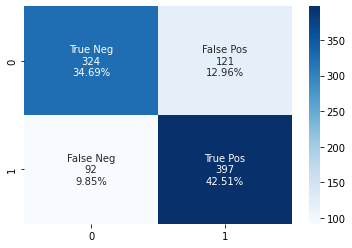

In [254]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Blues')

# Summary:
## 42.51% True positives - These are the customers about which we need to do something, otherwise they are propably gonna quit the company

## 12.96% False Positives - These are  the customers for which we will lose money because the promotion offered to these customers will just be an extra cost.

## 34.69% True Negatives - These are the happy customers, they are not gonna quit the company so we don't have to do anything about them

## 9.85% False Negatives - These are the customers about which we should do something, but we predicted them as "Happy Customers", so we won't do anything about them, and we will propably lose them